<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** Anh Khoi Vo

**Student ID:** 223262778

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations



VicCrashAnalytics stands at the forefront of data consultation, playing an instrumental role in determining Victoria's road safety trajectory. We're proud to collaborate with the Victorian government's Department of Transport (DOT), focusing primarily on the concerning trend of blackspots - areas known for higher traffic accident rates. It's not only about pinpointing these spots but also investigating the underlying reasons, whether they be demographic, environmental, or road-based.

The profound significance of this mission is evident when you grasp its wider consequences. Recognizing and comprehending these blackspots allows us to launch more effective awareness campaigns, propose evidence-backed legislative changes, and suggest possible infrastructure enhancements. By decoding the factors leading to blackspots, we can aim to save lives, minimize injuries, and improve road safety in Victoria.

We have a dual mission:

Descriptive Examination: Thoroughly explore the Blackspot.csv dataset to reveal patterns, relationships, and insights tied to blackspot occurrences, demographic factors, and specific road details.

Predictive Framework: Craft a robust machine learning system that predicts blackspot risks using the provided data. This tool will facilitate early detection and help formulate timely responses.

Our insights and forecasts will be conveyed to Mr. Michael Howards, supporting both VicCrashAnalytics and the DOT in their esteemed mission to elevate road safety.


<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation



##Import Data

In [ ]:
# Load requires libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CloudDeakin
import warnings
warnings.filterwarnings('ignore')

url= 'https://raw.githubusercontent.com/voanhkhoi16399/Rawdata/main/Blackspot.csv'
df = pd.read_csv(url)
df
#explore the dataset
print(df)

print('Sample size:', df.shape[0])
print('Number of columns:', df.shape[1])


        ID               EZI_ROAD_NAME              ROAD_NAME ROAD_TYPE  \
0     3699                  GROVE ROAD                  GROVE      ROAD   
1      576          BACCHUS MARSH ROAD          BACCHUS MARSH      ROAD   
2      758                GRUBBED ROAD                GRUBBED      ROAD   
3       89                VIGOR STREET                  VIGOR    STREET   
4     8773                FAIRMAN ROAD                FAIRMAN      ROAD   
...    ...                         ...                    ...       ...   
5321   256  WARBURTON-WOODS POINT ROAD  WARBURTON-WOODS POINT      ROAD   
5322  5182             GLENELG HIGHWAY                GLENELG   HIGHWAY   
5323  4196          CAPE PATERSON ROAD          CAPE PATERSON      ROAD   
5324  4352                MCPHANS ROAD                MCPHANS      ROAD   
5325   223                 ROGERS ROAD                 ROGERS      ROAD   

      AGE_LESS_THAN_15YRS_PCNT  AGE_15_24YRS_PCNT  AGE_25_44YRS_PCNT  \
0                     0.121

##EDA

In [ ]:
# Return the first n rows.
df.head()

,ID,EZI_ROAD_NAME,ROAD_NAME,ROAD_TYPE,AGE_LESS_THAN_15YRS_PCNT,AGE_15_24YRS_PCNT,AGE_25_44YRS_PCNT,AGE_45_64YRS_PCNT,AGE_18YRS_OVER_PCNT,AGE_65YRS_OVER_PCNT,...,Parkland%,Primary_Production%,Lq_Licenses,Intersection,Supermarket,primary_school,secondary_school,km_post,traffic_signal,Blackspot
0,3699,GROVE ROAD,GROVE,ROAD,0.121988,0.058735,0.228916,0.269578,0.853916,0.320783,...,0.358321,0.0,14.0,non-Intersection,0,0,0,0,0,Blackspot
1,576,BACCHUS MARSH ROAD,BACCHUS MARSH,ROAD,0.215894,0.141722,0.312583,0.201325,0.741722,0.128477,...,0.000000,1.0,0.0,Intersection,0,0,0,1,0,Blackspot
2,758,GRUBBED ROAD,GRUBBED,ROAD,0.185304,0.102236,0.194888,0.348243,0.757188,0.169329,...,1.000000,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
3,89,VIGOR STREET,VIGOR,STREET,0.167763,0.062500,0.286184,0.322368,0.815789,0.161184,...,0.036599,0.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot
4,8773,FAIRMAN ROAD,FAIRMAN,ROAD,0.201238,0.108359,0.204334,0.340557,0.761610,0.145511,...,0.000000,1.0,0.0,non-Intersection,0,0,0,0,0,non-Blackspot


In [ ]:
#Count number of distinct values in each comlumn
distinct_count = df['EZI_ROAD_NAME'].nunique()
print(f"Number of distinct values in the column: {distinct_count}")
distinct_counts = df.nunique()
print(distinct_counts)

Number of distinct values in the column: 2185
ID                                 5326
EZI_ROAD_NAME                      2185
ROAD_NAME                          2020
ROAD_TYPE                             6
AGE_LESS_THAN_15YRS_PCNT            393
AGE_15_24YRS_PCNT                   384
AGE_25_44YRS_PCNT                   389
AGE_45_64YRS_PCNT                   394
AGE_18YRS_OVER_PCNT                 395
AGE_65YRS_OVER_PCNT                 393
SEO_PERSONS_PCNT                    386
FC_COUPLE_NO_CHILDREN_PCNT          341
FC_COUPLE_WITH_CHILDREN_PCNT        362
FC_SINGLE_PARENT                    318
CARS_ZERO_HH_PCNT                   193
CARS_ONE_HH_PCNT                    366
CARS_TWO_OR_MORE_HH_PCNT            378
DWELLING_SEP_HOUSE_PCNT             196
DWELLING_SEMID_RO_OR_TCE_H_TH_P     140
DWELLING_FLAT_UNIT_APART_PCNT        80
OCCUPATION_WHITE_COLLAR_PCNT        380
OCCUPATION_BLUE_COLLAR_PCNT         381
SEIFA                               202
Commercial%                       

In [ ]:
# What are the columns and their datatypes?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5326 entries, 0 to 5325
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               5326 non-null   int64  
 1   EZI_ROAD_NAME                    5326 non-null   object 
 2   ROAD_NAME                        5326 non-null   object 
 3   ROAD_TYPE                        5326 non-null   object 
 4   AGE_LESS_THAN_15YRS_PCNT         5326 non-null   float64
 5   AGE_15_24YRS_PCNT                5326 non-null   float64
 6   AGE_25_44YRS_PCNT                5326 non-null   float64
 7   AGE_45_64YRS_PCNT                5326 non-null   float64
 8   AGE_18YRS_OVER_PCNT              5326 non-null   float64
 9   AGE_65YRS_OVER_PCNT              5317 non-null   float64
 10  SEO_PERSONS_PCNT                 5326 non-null   float64
 11  FC_COUPLE_NO_CHILDREN_PCNT       5326 non-null   float64
 12  FC_COUPLE_WITH_CHILD

###Missing value

In [ ]:
df.isnull().sum().sort_values(ascending=False)

AGE_65YRS_OVER_PCNT                9
Lq_Licenses                        6
Primary_Production%                0
OCCUPATION_BLUE_COLLAR_PCNT        0
SEIFA                              0
Commercial%                        0
Industrial%                        0
Residential%                       0
Parkland%                          0
ID                                 0
DWELLING_FLAT_UNIT_APART_PCNT      0
Intersection                       0
Supermarket                        0
primary_school                     0
secondary_school                   0
km_post                            0
traffic_signal                     0
OCCUPATION_WHITE_COLLAR_PCNT       0
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0
EZI_ROAD_NAME                      0
AGE_18YRS_OVER_PCNT                0
ROAD_NAME                          0
ROAD_TYPE                          0
AGE_LESS_THAN_15YRS_PCNT           0
AGE_15_24YRS_PCNT                  0
AGE_25_44YRS_PCNT                  0
AGE_45_64YRS_PCNT                  0
S

In [ ]:
# drop nulls
df.dropna(inplace=True)
# inpsect left nulls
df[['AGE_65YRS_OVER_PCNT','Lq_Licenses']].isnull().sum()


AGE_65YRS_OVER_PCNT    0
Lq_Licenses            0
dtype: int64

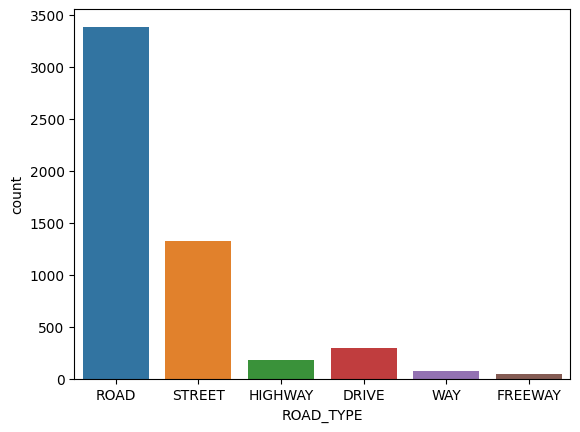

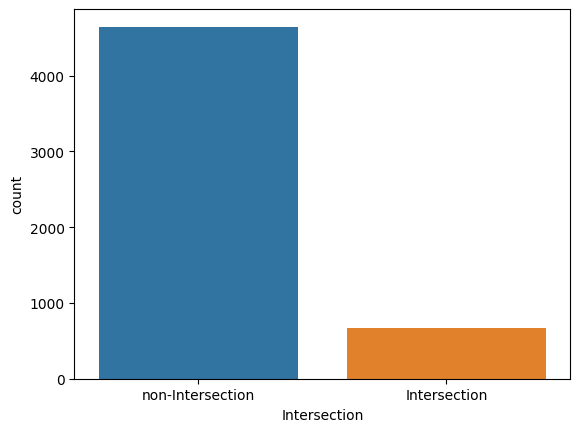

In [ ]:
cat_variables = ['ROAD_TYPE','Intersection']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=df[i])

###Data Transforming

In [ ]:
# convert binary column
df['Intersection_bi'] = 0
df.loc[df['Intersection'] == 'Intersection', 'Intersection_bi'] = 1

In [ ]:
# encoding catgorical column
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
print('Number of unique value in ROAD_TYPE column:', len(df['ROAD_TYPE'].unique()))
df['ROAD_TYPE'] = enc.fit_transform(df['ROAD_TYPE'])



Number of unique value in ROAD_TYPE column: 6


###Labeling

In [ ]:
df['Blackspot_bi'] = 0
df.loc[df['Blackspot'] == 'Blackspot', 'Blackspot_bi'] = 1

###Remove unneed column

In [ ]:
df = df.drop(columns= {'ID', 'EZI_ROAD_NAME','ROAD_NAME','Intersection','Blackspot'})

###Correlation with blackspot

In [ ]:

#correlation with blackspot
correlation_matrix = df.corr()
correlation_with_Blackspot = df.corr()['Blackspot_bi'].sort_values(ascending=False)
print(correlation_with_Blackspot)

Blackspot_bi                       1.000000
Intersection_bi                    0.511644
Commercial%                        0.379817
Lq_Licenses                        0.367044
DWELLING_SEMID_RO_OR_TCE_H_TH_P    0.295508
DWELLING_FLAT_UNIT_APART_PCNT      0.287524
CARS_ZERO_HH_PCNT                  0.282712
Supermarket                        0.255933
CARS_ONE_HH_PCNT                   0.245975
traffic_signal                     0.236044
FC_SINGLE_PARENT                   0.172905
Industrial%                        0.120063
AGE_65YRS_OVER_PCNT                0.114711
Residential%                       0.096106
ROAD_TYPE                          0.084799
AGE_18YRS_OVER_PCNT                0.079004
primary_school                     0.055896
FC_COUPLE_NO_CHILDREN_PCNT         0.036631
AGE_25_44YRS_PCNT                  0.031537
secondary_school                   0.031252
AGE_15_24YRS_PCNT                  0.025090
OCCUPATION_BLUE_COLLAR_PCNT        0.011249
OCCUPATION_WHITE_COLLAR_PCNT    

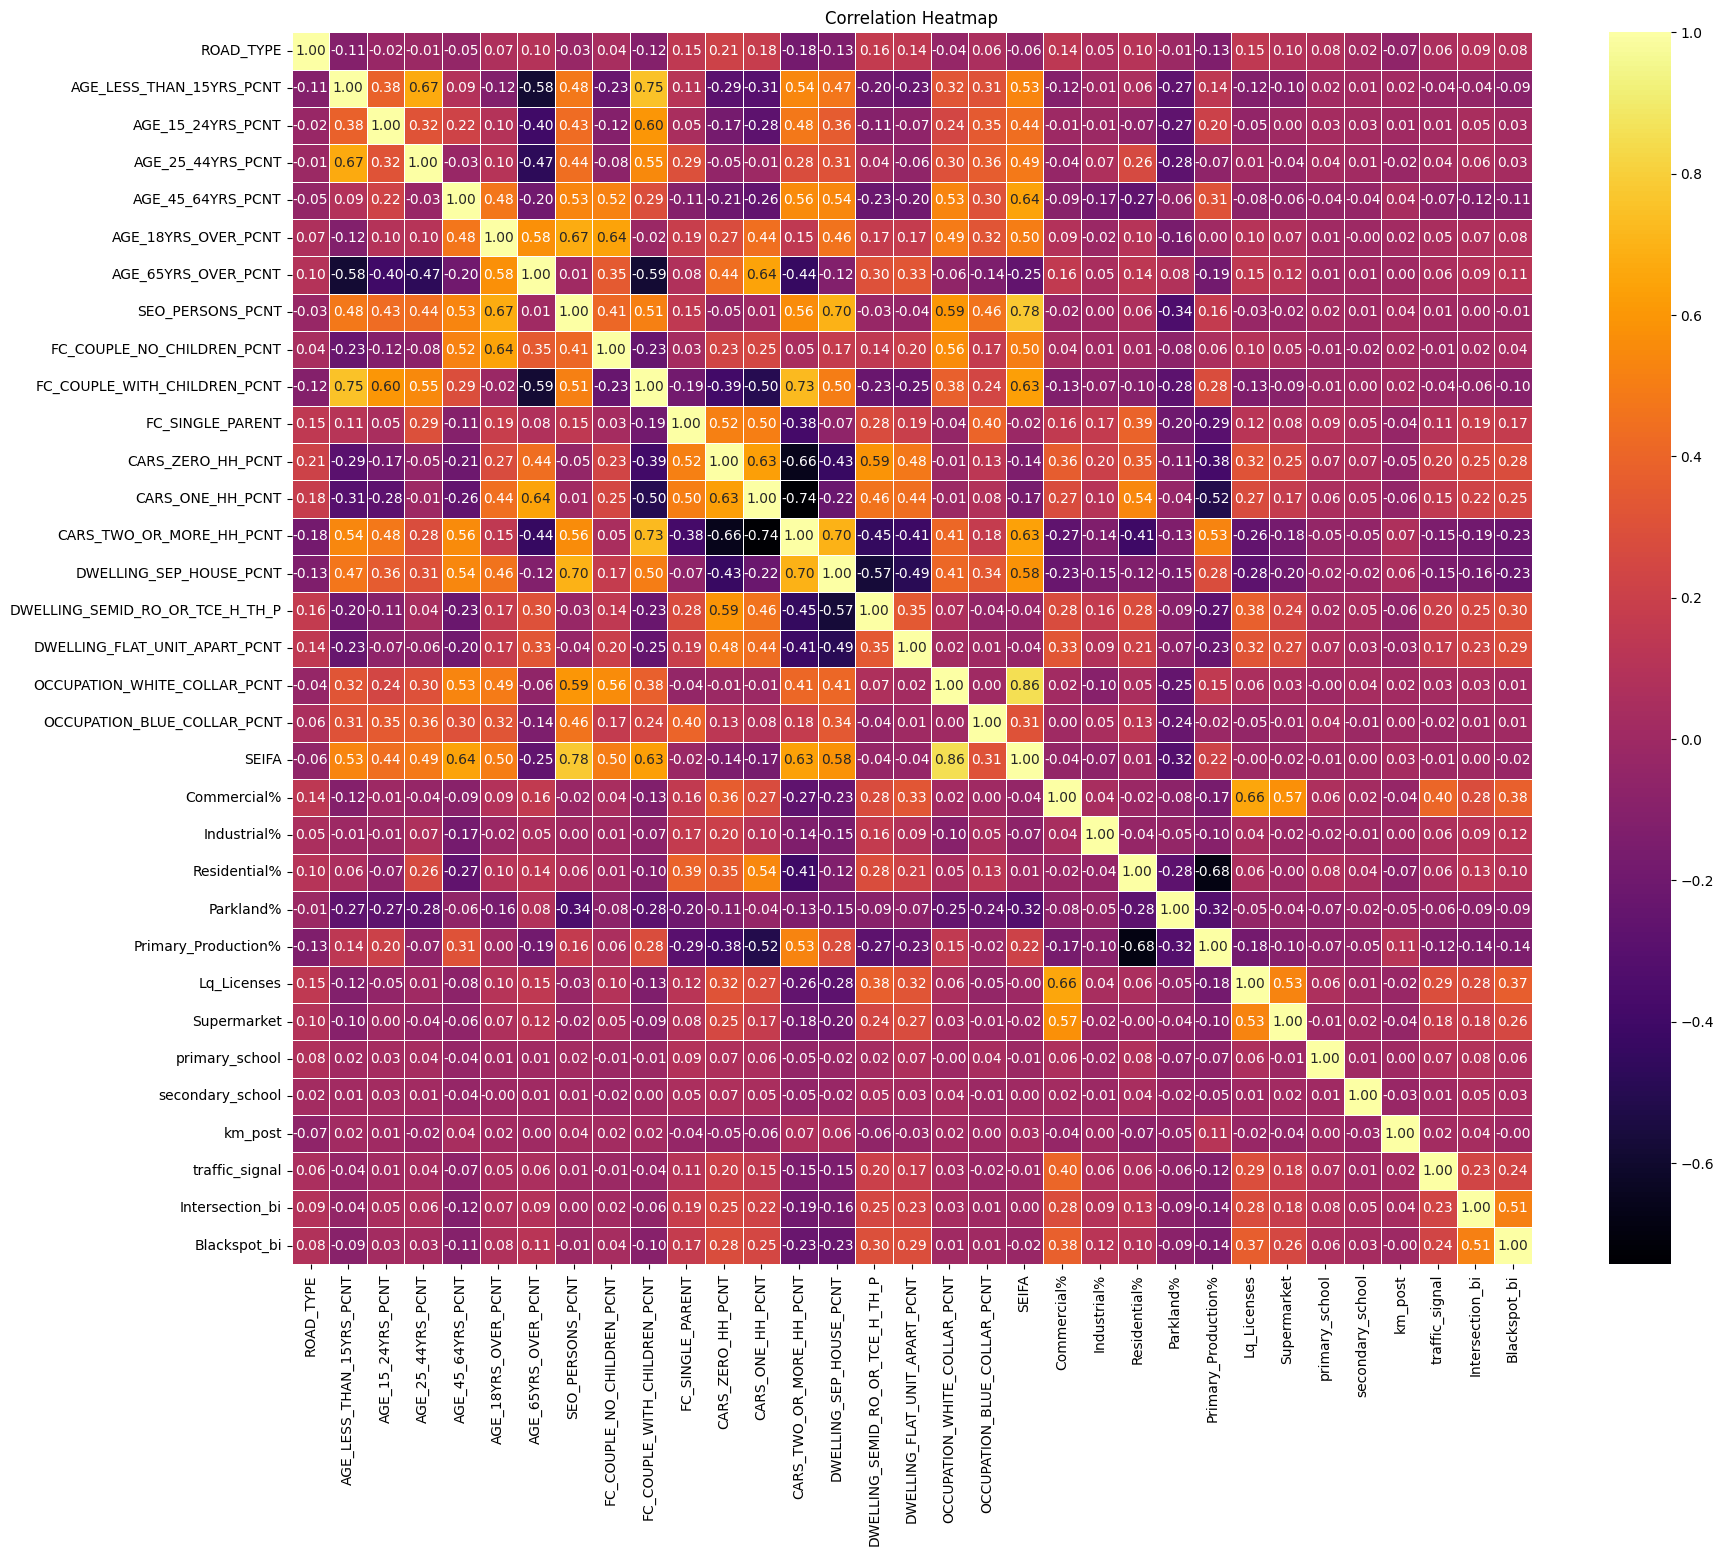

In [ ]:
# Create a heatmap
plt.figure(figsize=(20,16))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def compute_vif(df, target_column):
    """
    Calculate VIF for all features in the dataframe, excluding the target column.

    Args:
    - df (pd.DataFrame): The dataframe containing the features and target.
    - target_column (str): The column name of the target variable.

    Returns:
    - vif_df (pd.DataFrame): A dataframe with attributes and their associated VIF values.
    """

    # Filter out the target column to get predictor features
    X = df.drop(columns=target_column)

    # Construct a dataframe for VIF values
    vif_df = pd.DataFrame({
        "Attribute": X.columns,
        "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })

    return vif_df.sort_values(by="VIF", ascending=False).reset_index(drop=True)

# Preprocess data by removing rows with NaN values
processed_data = df.dropna()

# Calculate VIF for the dataset
vif_results = compute_vif(processed_data, 'Blackspot_bi')
vif_results


,Attribute,VIF
0,AGE_18YRS_OVER_PCNT,4470.986694
1,CARS_TWO_OR_MORE_HH_PCNT,1069.271267
2,AGE_45_64YRS_PCNT,1058.573631
3,SEIFA,923.329331
4,DWELLING_SEP_HOUSE_PCNT,730.094895
5,AGE_65YRS_OVER_PCNT,525.894212
6,AGE_25_44YRS_PCNT,525.395804
7,SEO_PERSONS_PCNT,506.507757
8,OCCUPATION_WHITE_COLLAR_PCNT,245.967915
9,CARS_ONE_HH_PCNT,195.201575


In [ ]:
# removing attribute before the index of 18
index = 18
multicolinear_cols = vif_data[:index]['Attribute'].to_list()
print('Attributes have multicollinearity:')
multicolinear_cols

NameError: ignored

###Data Exploration


In [ ]:
#Pie chare of Blackspot

l = list(df['Blackspot_bi'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No','Yes'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Blackspot - No Blackspot%');

plt.subplot(1,2,2)
ax = sns.countplot(x='Blackspot_bi',data = df,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Blackspot','Blackspot'])

plt.title('Number of Blackspot - No blackspot');
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_counts(data_frame, columns):
    """
    Plot count plots for given categorical columns in the data frame.

    Args:
    - data_frame (pd.DataFrame): The dataframe to source data from.
    - columns (list): List of column names to plot.
    """
    fig, axes = plt.subplots(2, 4, figsize=(10, 6))

    for ax, column in zip(axes.ravel(), columns):
        sns.countplot(data=data_frame, x=column, ax=ax)
        ax.set_title(column)
        ax.set_ylabel('Count')  # Optionally setting y-label to make plots clearer

    plt.tight_layout()
    plt.show()

# Data preparation and columns of interest
working_data = df.copy()
columns_of_interest = ['Supermarket', 'primary_school', 'secondary_school',
                       'km_post', 'traffic_signal', 'Intersection_bi', 'ROAD_TYPE']

plot_categorical_counts(working_data, columns_of_interest)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data_distribution(df, columns_to_drop, attributes, color='orange'):
    """
    Display distribution plots of the specified attributes.

    Args:
    - df (pd.DataFrame): Data to plot.
    - columns_to_drop (list): Columns to remove due to multicollinearity.
    - attributes (list): List of column names to plot.
    - color (str): Color for the plot. Default is 'orange'.
    """
    # Create a fresh copy and drop specified columns
    data = df.drop(columns=columns_to_drop)

    fig, axes = plt.subplots(2, 4, figsize=(10, 6))

    for ax, attribute in zip(axes.ravel(), attributes):
        sns.kdeplot(data=data[attribute], ax=ax, color=color)

    plt.tight_layout()
    plt.show()

# List of columns & attributes
cols_to_drop = multicolinear_cols
plot_attributes = ['CARS_ZERO_HH_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P',
                   'DWELLING_FLAT_UNIT_APART_PCNT', 'Commercial%', 'Industrial%',
                   'Parkland%', 'Primary_Production%', 'Lq_Licenses']

plot_data_distribution(df, cols_to_drop, plot_attributes)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df, drop_columns, transform_attributes):
    """
    Preprocess the dataframe by dropping columns and applying log transformation on specified attributes.

    Args:
    - df (pd.DataFrame): Original data.
    - drop_columns (list): List of columns to drop.
    - transform_attributes (list): List of attributes to log-transform.

    Returns:
    - pd.DataFrame: Preprocessed data.
    """
    df_copy = df.copy()
    df_copy = df_copy.drop(columns=drop_columns)

    for col in transform_attributes:
        df_copy[col] = np.log(df_copy[col])

    return df_copy

def plot_attribute_distributions(data, attributes):
    """
    Plot the distribution of the given attributes.

    Args:
    - data (pd.DataFrame): Data containing the attributes to plot.
    - attributes (list): List of attributes to plot.
    """
    fig, axs = plt.subplots(2, 4, figsize=(10, 6))
    axs = axs.ravel()

    for ind, attribute in enumerate(attributes):
        sns.kdeplot(data=data[attribute], ax=axs[ind], color='green')

    plt.tight_layout()
    plt.show()

# Define columns and attributes
drop_columns = multicolinear_cols
attributes = ['CARS_ZERO_HH_PCNT', 'DWELLING_SEMID_RO_OR_TCE_H_TH_P',
             'DWELLING_FLAT_UNIT_APART_PCNT', 'Commercial%', 'Industrial%',
             'Parkland%', 'Primary_Production%', 'Lq_Licenses']

# Process data and plot
processed_data = preprocess_data(df, drop_columns, attributes)
plot_attribute_distributions(processed_data, attributes)


<a id = "cell_modeling"></a>
## 3. Machine learning model development


In [ ]:
# removing attribute before the index of 18
index = 18
multicolinear_cols = vif_data[:index]['Attribute'].to_list()
print('Attributes have multicollinearity:')
multicolinear_cols

### Preparing data

In [ ]:
# drop label column and multiconlinearity column

# assign x as predictors and drop columns having multiconlinearity
x = df.drop(columns=multicolinear_cols)
# drop label out of x
x = x.drop(columns='Blackspot_bi')

# assign y as label column
y = df['Blackspot_bi']

###Splitting data

In [ ]:
#Splitting our data into train and test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state  = 2023)

In [ ]:
print('-- Number of labels before Balancing --')
print('Train set')
print(y_train.value_counts())
print('\n')

print('Test set')
print(y_test.value_counts())

###Handling imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

# define pipeline
sm = SMOTE(random_state=365)
x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
print('-- Number of labels after Balancing --')
print('Train set')
print(y_train.value_counts())
print('\n')

print('Test set')
print(y_test.value_counts())

### Training models

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lr_model = LogisticRegression().fit(x_train,y_train)
y_pred = lr_model.predict(x_test)

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       


###Classification Report

In [ ]:
# Accuracy
print('Accuracy = ' + str(accuracy_score(y_test,y_pred)))

# cassification report
print(classification_report(y_test,y_pred))


###Confusion matrix

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_hat)
ax = sns.heatmap(cm, annot=True, fmt='g')
ax.set_ylabel('Actual')
ax.set_xlabel('Predicted')
plt.show()

###ROC and AUC

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_probs = reg.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

custom_ticks = [0.0, 0.5, 0.8, 0.85, 0.9, 1.0]
plt.xticks(custom_ticks)
plt.yticks(custom_ticks)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


###Important Weight

In [ ]:
# To get the weights of all the variables
weights = pd.Series(reg.coef_[0], index=x_train.columns.values)

print (weights.sort_values(ascending = False).plot(kind='bar'))